
## Домашнее задание 5. Вероятность. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline


### Задача 1.


Имеется симметричная монета coin, например, coin(10) вернет результат 10 бросков симметричной монеты. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

<img src="1.png" alt="Описание изображения">

<img src="2.png" alt="Описание изображения">

In [3]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    bernul_val = coin(precision * np.prod(size)).reshape(np.prod(size), precision)
    convert_arr = (1/2)**(np.arange(1, precision + 1))
    res = (bernul_val @ convert_arr).reshape(size);
    return res
    
def plot_uniform_density(size=200):
    sample = uniform(size)
    grid = np.linspace(-0.25, 1.25, 500)
    plt.figure(figsize=(12, 5))
    plt.hist(sample, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.xlabel('Значение', fontsize=17)
    plt.ylabel('Плотность', fontsize=17)
    plt.plot(grid, uniform_pdf(grid), color='red', 
         lw=1, label='Плотность случайной величины') 
    plt.scatter(sample, [0] * size, alpha=0.4)
    plt.title('Плотность равномерного распределения', fontsize=20)
    plt.legend(fontsize=14)
    return plt.gcf()


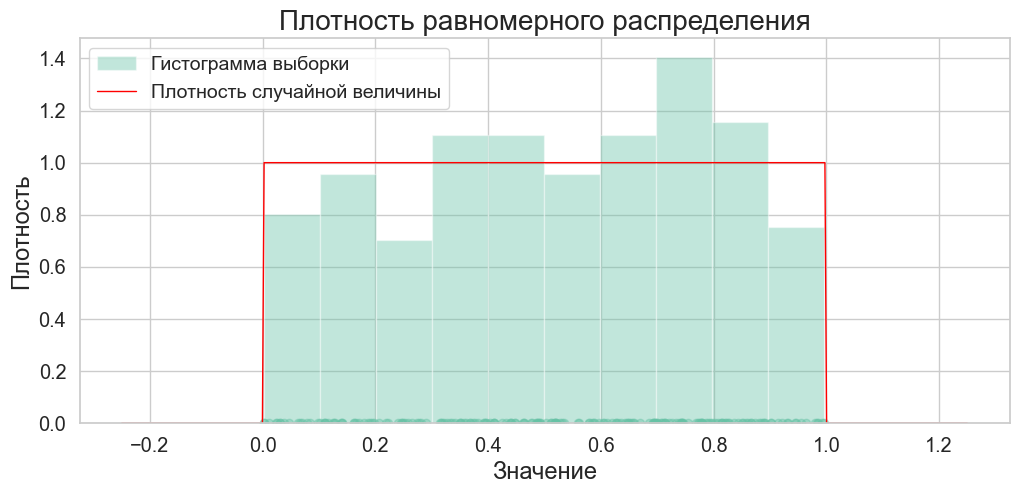

In [4]:
graph = plot_uniform_density()

In [111]:
def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        sample = uniform(size, precision)
        plt.scatter(sample, np.zeros(size), alpha=0.4);
        plt.yticks([])
        if i < 4:
            plt.xticks([])
    plt.suptitle('Зависимость значений случайных величин от точности', fontsize=20)
    return plt.gcf()

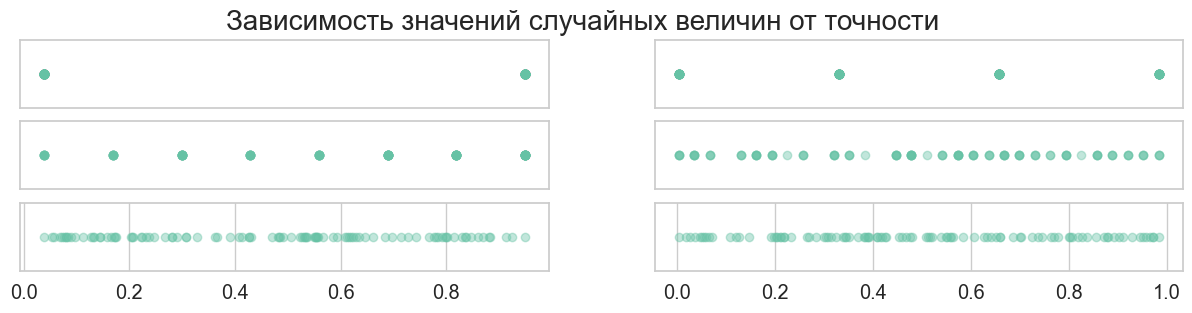

In [112]:
graph = plot_uniform_different_precision()

<img src="3.png" alt="Описание изображения">

In [97]:
def normal(size=1, loc=0, scale=1, precision=30):
    first_uniform_val = uniform(size, precision).reshape(np.prod(size))
    second_uniform_val = uniform(size, precision).reshape(np.prod(size))
    res = loc + scale * np.sin(2 * np.pi * first_uniform_val) * ((- 2.0 * np.log(second_uniform_val)) ** 0.5)
    return res.reshape(size)


def plot_normal_density(size=200):
    sample = normal(size)
    grid = np.linspace(-3, 3, 500)
    plt.figure(figsize=(12, 5))
    plt.hist(sample, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.xlabel('Значение', fontsize=17)
    plt.ylabel('Плотность', fontsize=17)
    plt.plot(grid, norm_pdf(grid), color='red', 
         lw=1, label='Плотность случайной величины') 
    plt.scatter(sample, [0] * size, alpha=0.4)
    plt.title('Плотность нормального распределения', fontsize=20)
    plt.legend(fontsize=14)
    return plt.gcf()

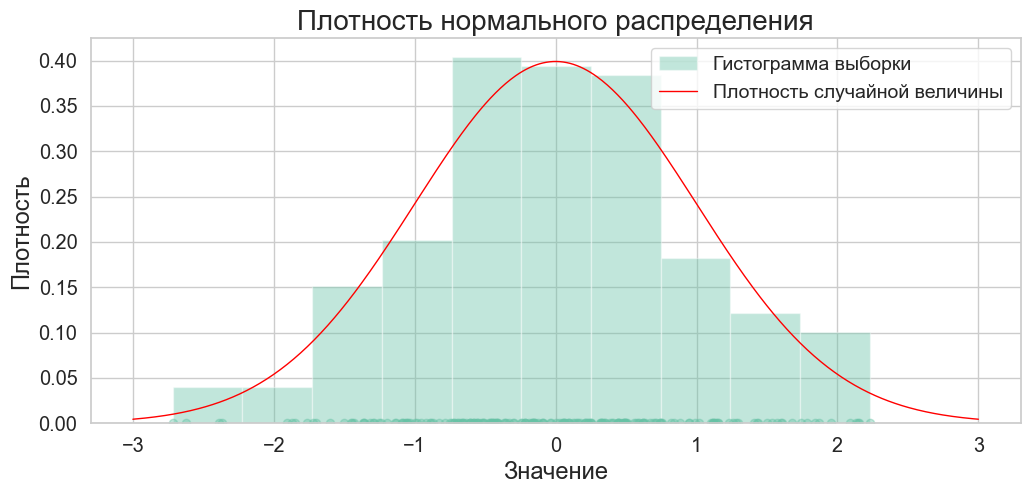

In [98]:
graph = plot_normal_density()

<img src="4.png" alt="Описание изображения">

In [103]:
def expon(size=1, lambd=1, precision=30):
    uniform_val = uniform(size, precision).reshape(np.prod(size))
    res = (-1 / lambd) * np.log(1 - uniform_val)
    return res.reshape(size)

def plot_expon_density(size=100):
    sample = expon(size)
    grid = np.linspace(-0.5, 5, 500)
    plt.figure(figsize=(12, 5))
    plt.hist(sample, bins=10, density=True, 
         alpha=0.4, label='Гистограмма выборки')
    plt.xlabel('Значение', fontsize=17)
    plt.ylabel('Плотность', fontsize=17)
    plt.plot(grid, expon_pdf(grid), color='red', 
         lw=1, label='Плотность случайной величины') 
    plt.scatter(sample, [0] * size, alpha=0.4)
    plt.title('Плотность экспоненциального распределения', fontsize=20)
    plt.legend(fontsize=14)
    return plt.gcf()

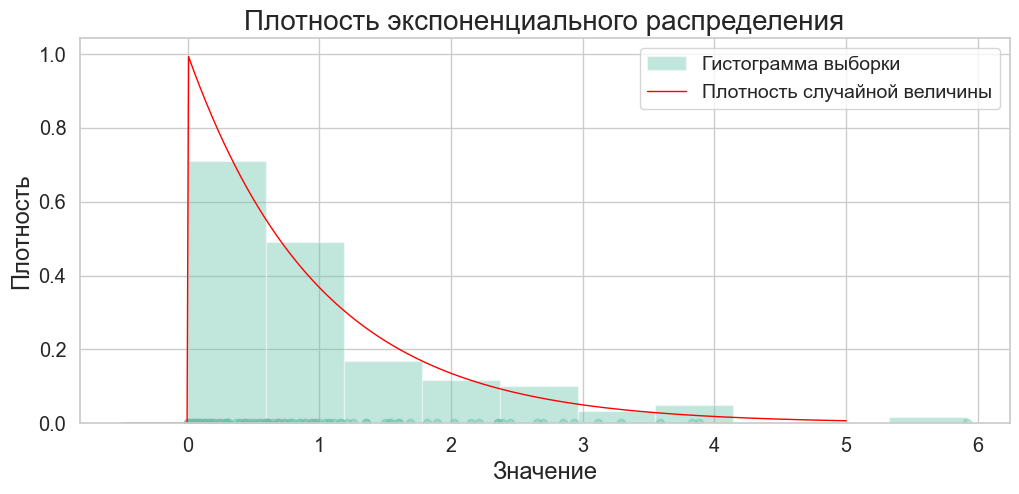

In [113]:
graph = plot_expon_density()

**Вывод:**
Случайные величины, полученные данными методами генерации, имеют плотности распределения близкие к заданным. Заметим, сгенерировав случайную величины с равномерным распределением, можем получить различные распределения, а именно нормальное и экспоненциальное.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

In [28]:
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

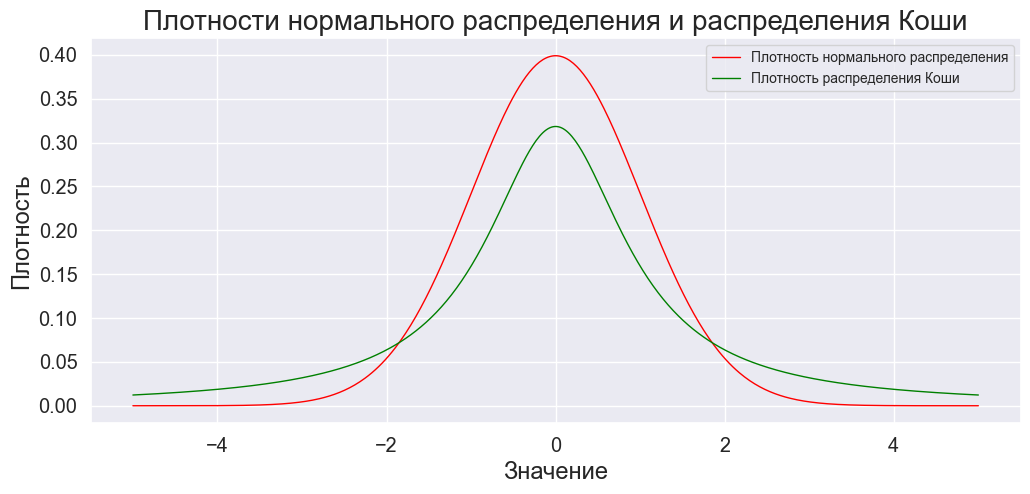

In [29]:
grid = np.linspace(-5, 5, 500)
plt.figure(figsize=(12, 5))
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.plot(grid, norm_pdf(grid), color='red', 
     lw=1, label='Плотность нормального распределения')
plt.title('Плотности нормального распределения и распределения Коши', fontsize=20)
plt.plot(grid, sps.cauchy.pdf(grid), color='green', 
     lw=1, label='Плотность распределения Коши')
plt.legend(fontsize=10)

Плотности нормального распределения и распределения Коши симметричны отностительно прямой x = a (в данном случае значение параментра a=0). У обеих функций максимум достигается в точке a. Плотность нормального распределения ассимптотически быстрее приближается к 0 в сравнении с плотностью распределения Коши.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Рассмотрим распределение Коши.

In [30]:
size = 1000
samples = sps.cauchy().rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)

Построим график.

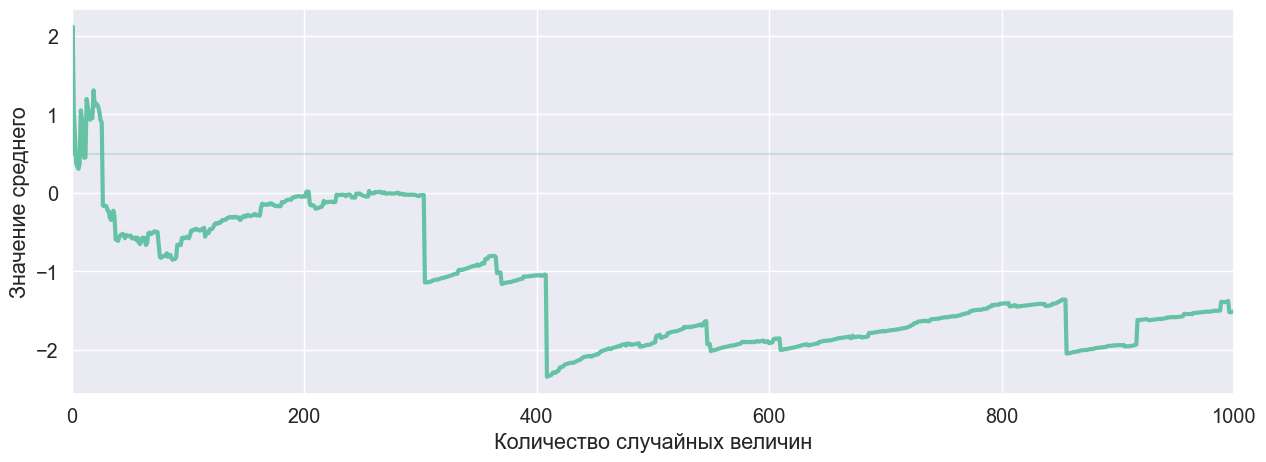

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Проведем 10 независимых экспериментов.

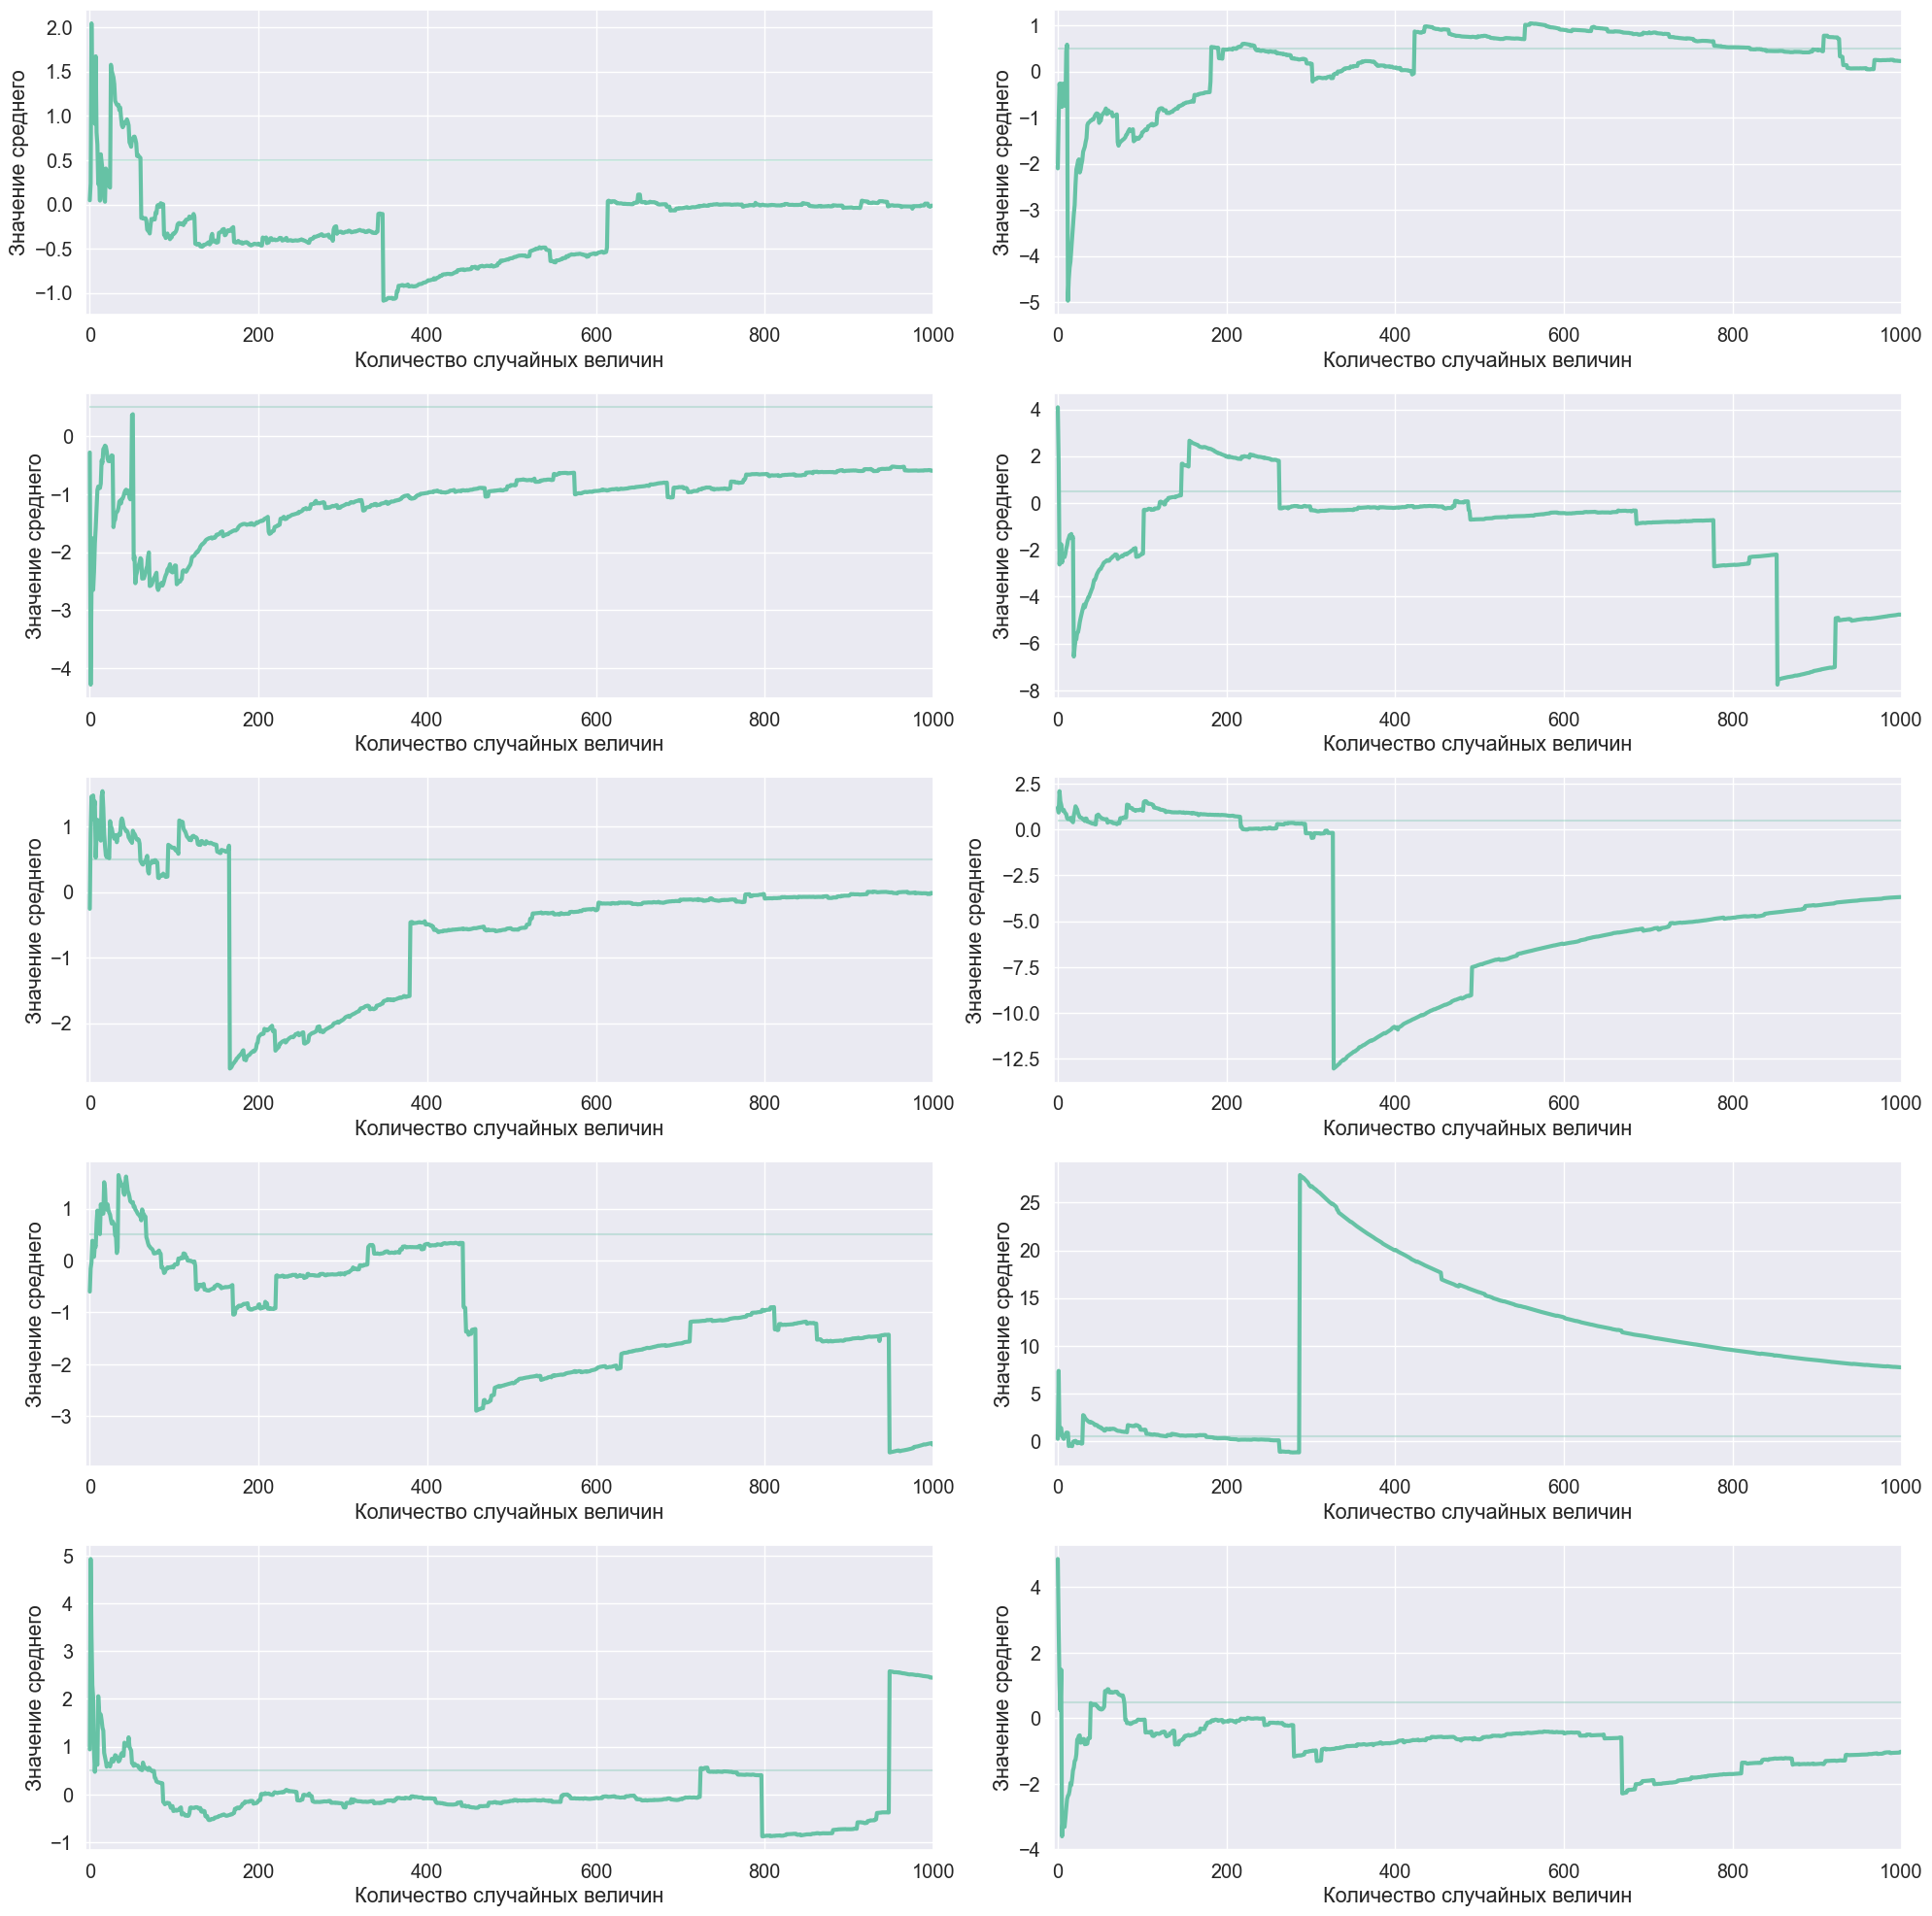

In [32]:
plt.figure(figsize=(20, 20))

for i in range(10):
    samples = sps.cauchy().rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин

In [33]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

И нарисуем их всех одним цветом

Text(0.5, 1.0, 'Случайные величины с распределением Коши')

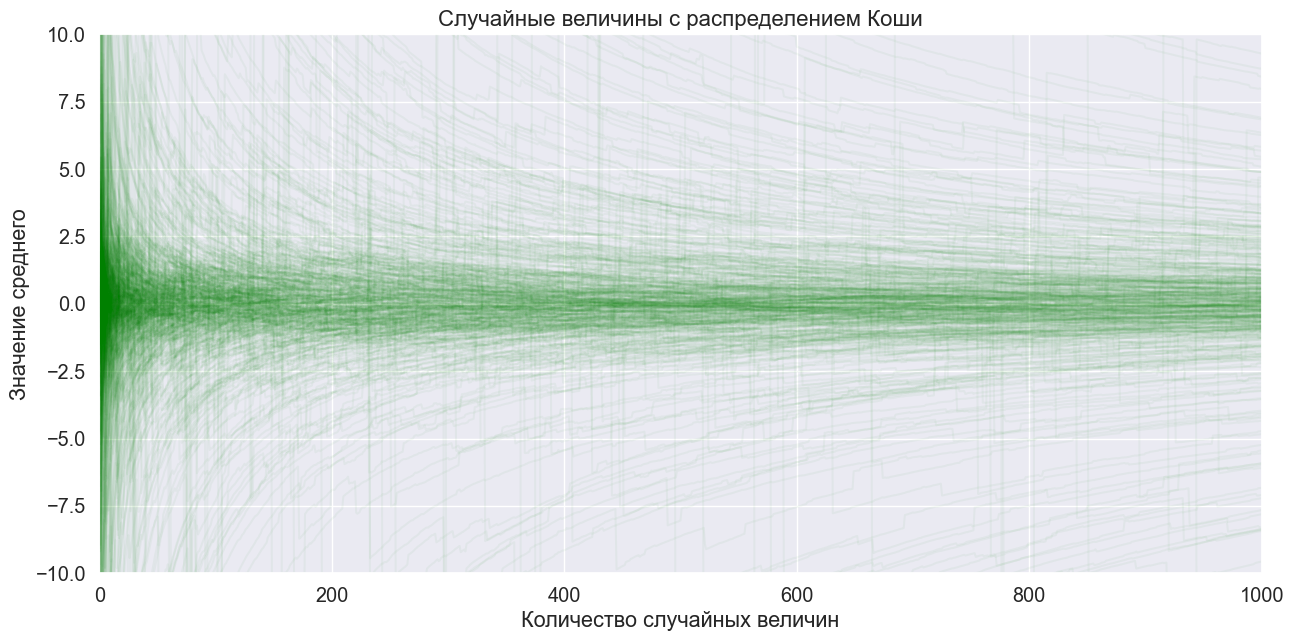

In [34]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.04)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.ylim(-10, 10)
plt.title('Случайные величины с распределением Коши', fontsize=16)

Эксперимент показал, что закон больших чисел не выполняется для распределения Коши.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Проведем 10 независимых экспериментов.

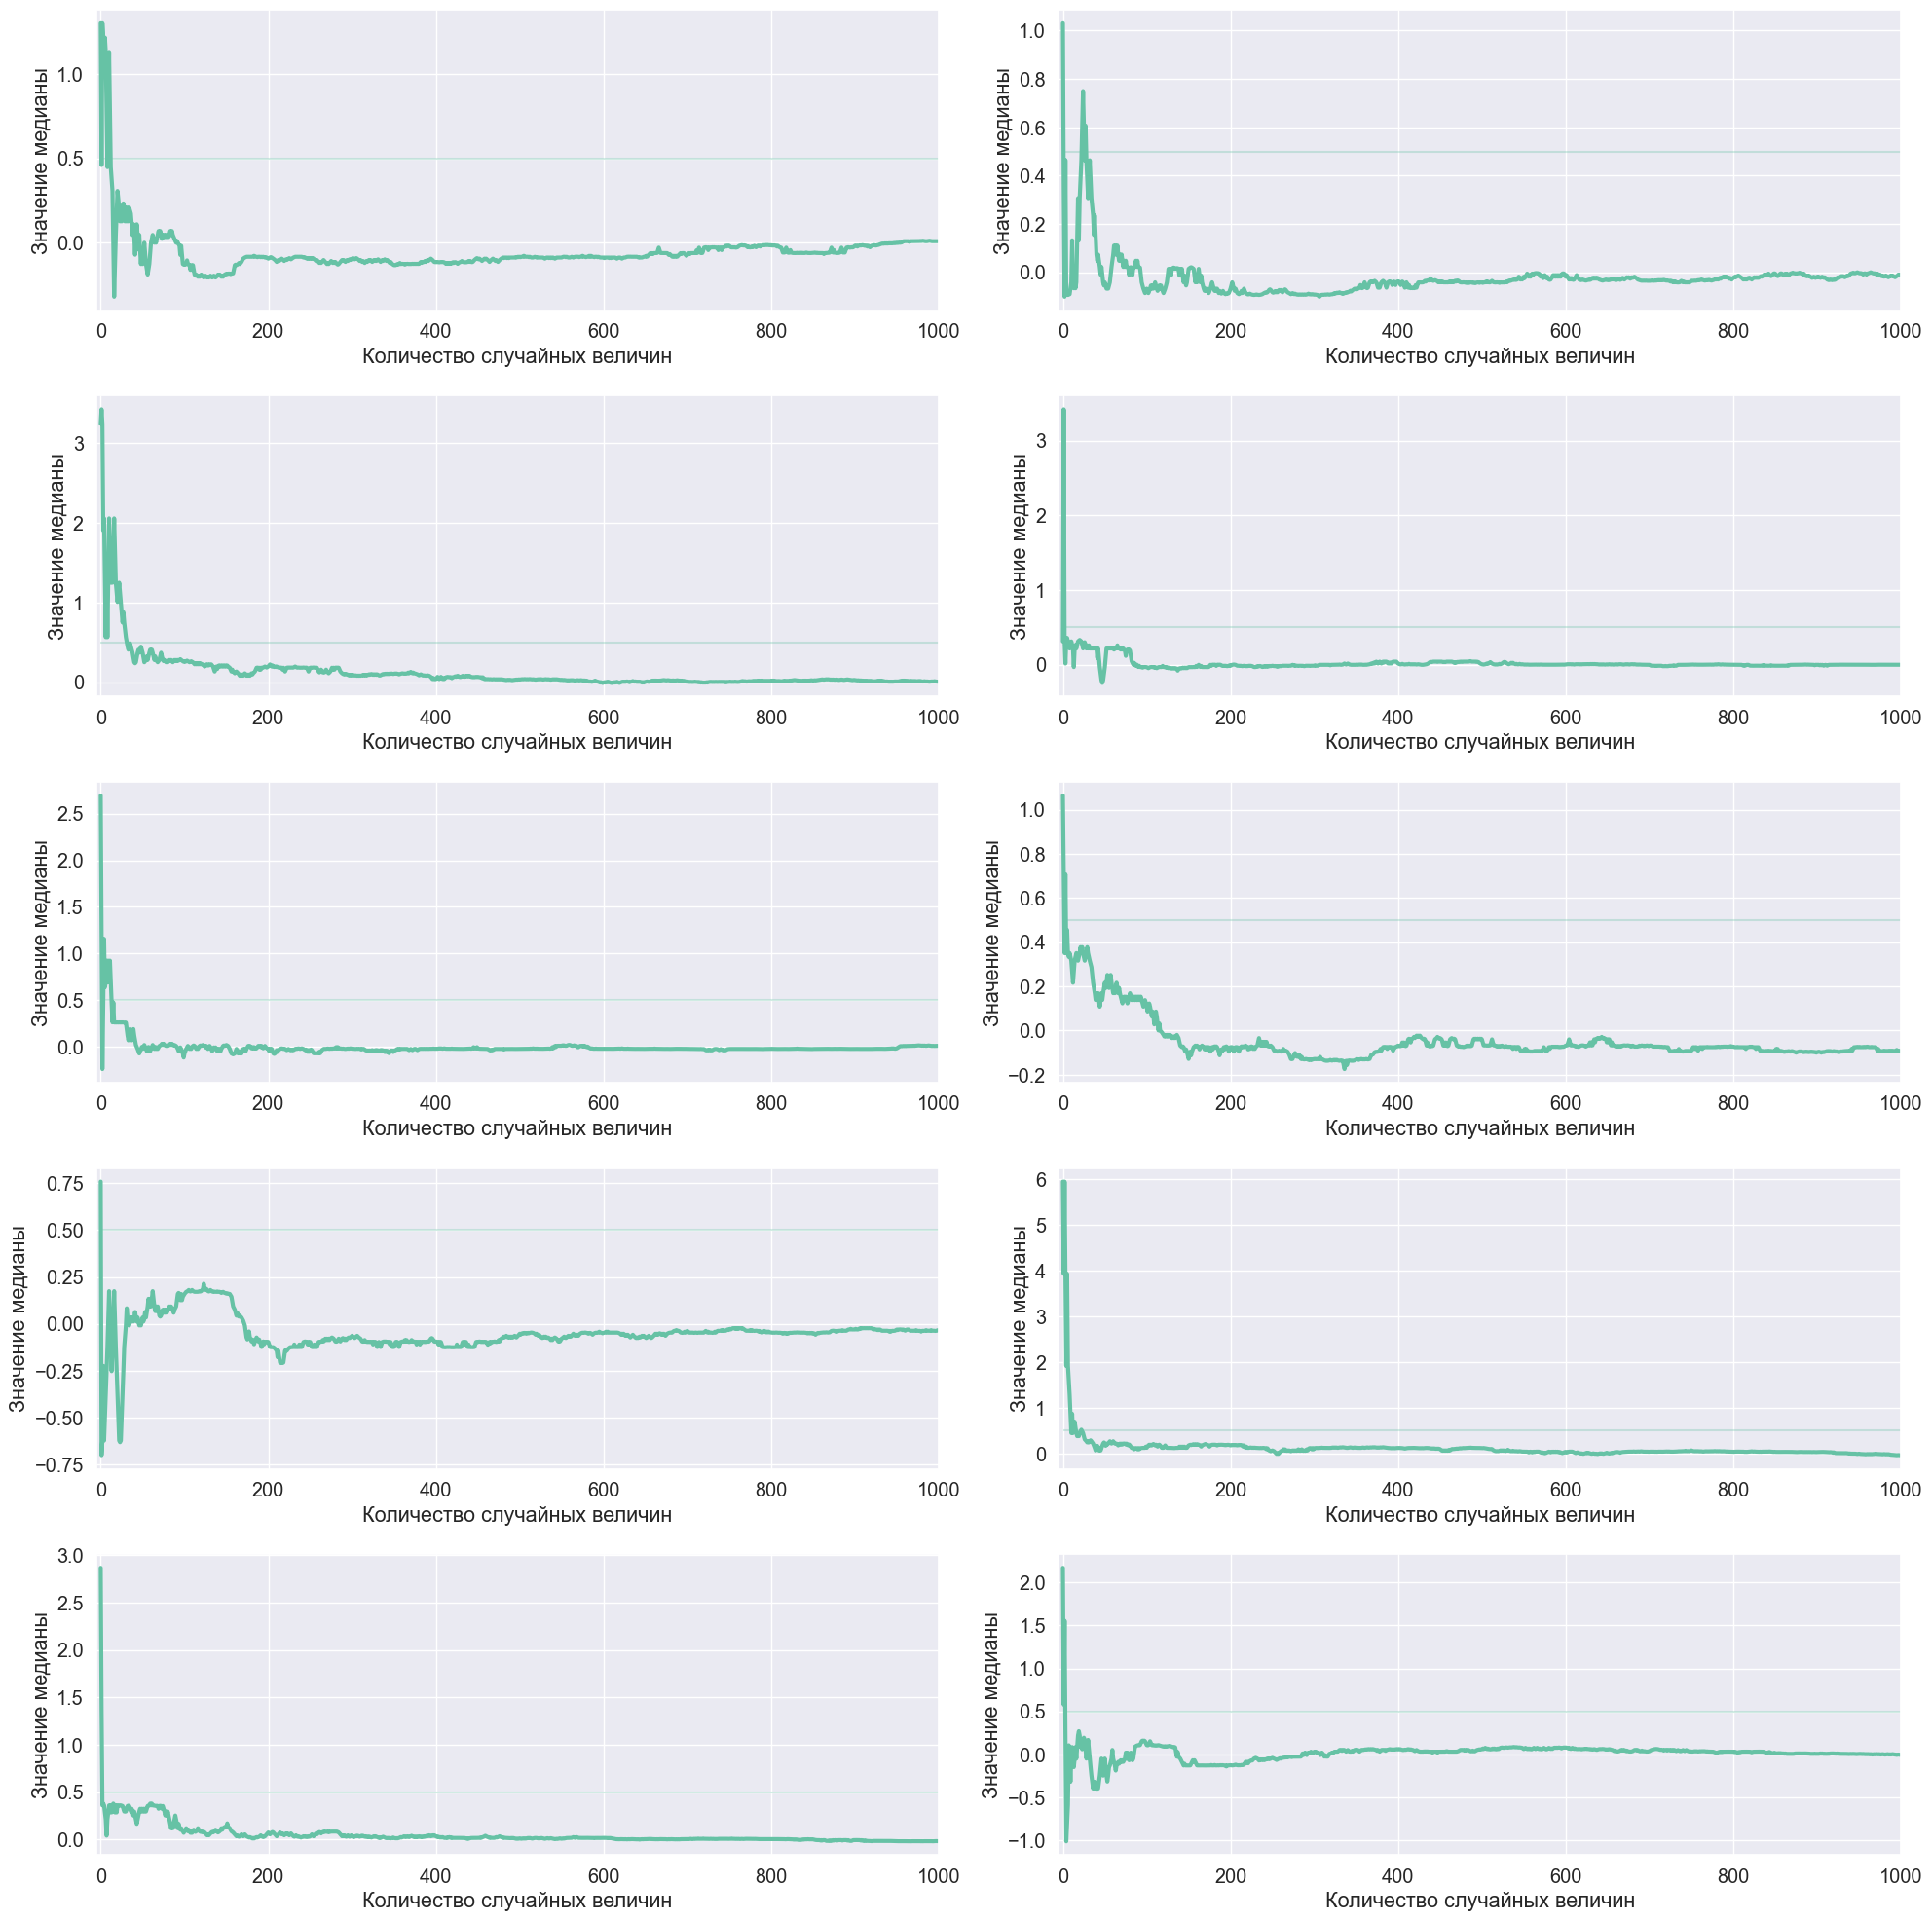

In [35]:
plt.figure(figsize=(20, 20))

for i in range(10):
    samples = sps.cauchy().rvs(size=size)
    medians = np.array([np.median(samples[:i]) for i in range(1, size + 1)])
    
    plt.subplot(5, 2, i+1)
    plt.plot(medians, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение медианы')
    plt.xlim((-5, size))
    
plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин

In [36]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy().rvs(size=(samples_count, size))
medians = [np.array([np.median(samples[j][:i]) for i in range(1, size + 1)]) for j in range(samples_count)]

И нарисуем их всех одним цветом

Text(0.5, 1.0, 'Случайные величины с распределением Коши')

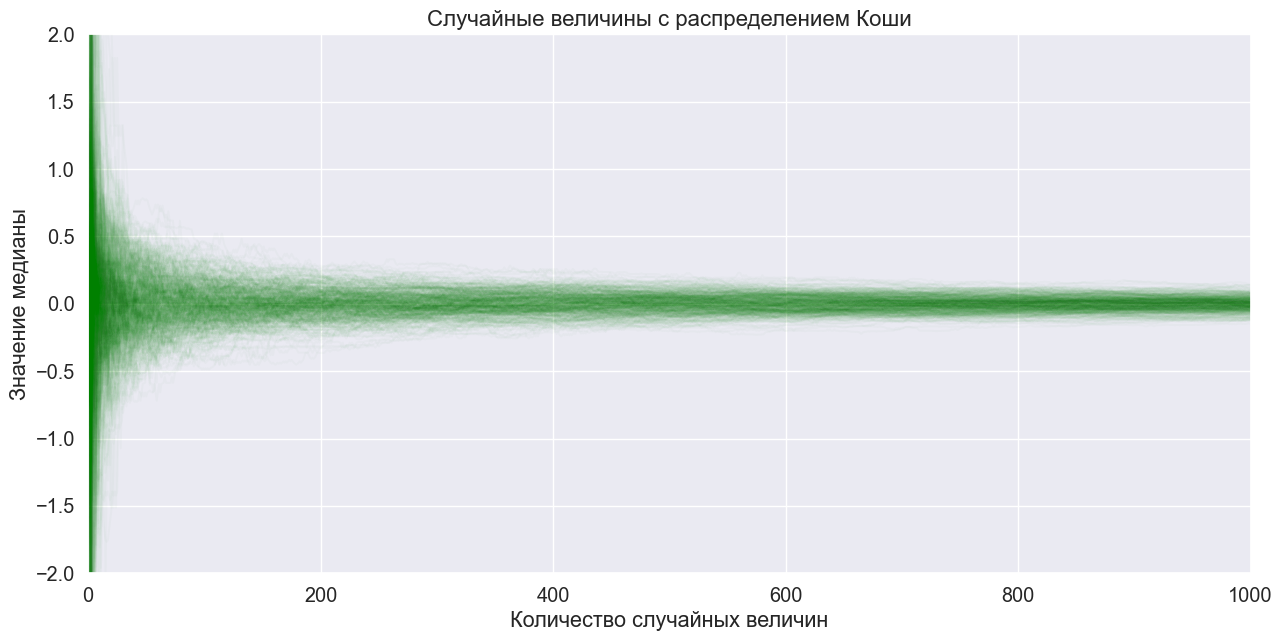

In [38]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[i], color='green', alpha=0.02)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size));
plt.ylim(-2, 2)
plt.title('Случайные величины с распределением Коши', fontsize=16)

**Вывод:**

Для распределения Коши закон больших чисел не выполняется, у данного распределения не существует математического ожидания. Эксперимент с медианой показал, что при большом количестве независимых случайных величин медиана будет стремиться к 0.